# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats 
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [28]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 556


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

northern_hemi = []
southern_hemi = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'appid=' + weather_api_key + '&q=' + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get (city_url)
        city_weather = weather_response.json ()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather ['coord']['lat']
        city_lng = city_weather ['coord']['lon']
        city_max_temp = city_weather ['main']['temp_max']    
        city_humidity = city_weather ['main']['humidity']
        city_clouds = city_weather ['clouds']['all']
        city_wind = city_weather ['wind']['speed']
        city_country = city_weather ['sys']['country']
        city_date = city_weather ['dt']
        
        # Append the City information into city_data list
        city_data.append({"name": city, 
                          "lat": city_lat, 
                          "lon": city_lng, 
                          "temp_max": city_max_temp,
                          "humidity": city_humidity,
                          "all": city_clouds,
                          "speed": city_wind,
                          "country": city_country,
                          "dt": city_date})
    
        if (city_lat >= 0):
    
            northern_hemi.append ({'name': city,
                                   'lat': city_lat,
                                   'lon': city_lng,
                                   'temp_max': city_max_temp,
                                   'humidity': city_humidity,
                                   'all': city_clouds,
                                   'speed': city_wind,
                                   'country': city_country,
                                   'dt': city_date})
        else:

            southern_hemi.append ({'name': city,
                                   'lat': city_lat,
                                   'lon': city_lng,
                                   'temp_max': city_max_temp,
                                   'humidity': city_humidity,
                                   'all': city_clouds,
                                   'speed': city_wind,
                                   'country': city_country,
                                   'dt': city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabedelo
Processing Record 2 of Set 1 | cururupu
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | enewetak
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | ocean city
Processing Record 11 of Set 1 | kangasniemi
Processing Record 12 of Set 1 | xichang
Processing Record 13 of Set 1 | pisco
Processing Record 14 of Set 1 | lata
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | timbuktu
Processing Record 17 of Set 1 | vilyuchinsk
Processing Record 18 of Set 1 | kulia village
City not found. Skipping...
Processing Record 19 of Set 1 | atafu village
Processing Record 20 of Set 1 | volchansk
Processing Record 21 of Set 1 | chonchi


In [30]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame (city_data)

# Show Record Count
city_data_df.count()

name        527
lat         527
lon         527
temp_max    527
humidity    527
all         527
speed       527
country     527
dt          527
dtype: int64

In [31]:
# Display sample data
city_data_df.head()

,name,lat,lon,temp_max,humidity,all,speed,country,dt
0,cabedelo,-6.9811,-34.8339,304.52,67,52,4.75,BR,1709743133
1,cururupu,-1.8283,-44.8683,301.30,86,76,2.43,BR,1709743134
2,hamilton,39.1834,-84.5333,288.84,97,100,5.14,US,1709742840
3,port-aux-francais,-49.3500,70.2167,280.23,85,97,10.05,TF,1709743136
4,enewetak,11.3474,162.3373,299.44,80,47,10.84,MH,1709743140


In [32]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [33]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,name,lat,lon,temp_max,humidity,all,speed,country,dt
City_ID,,,,,,,,,
0,cabedelo,-6.9811,-34.8339,304.52,67,52,4.75,BR,1709743133
1,cururupu,-1.8283,-44.8683,301.30,86,76,2.43,BR,1709743134
2,hamilton,39.1834,-84.5333,288.84,97,100,5.14,US,1709742840
3,port-aux-francais,-49.3500,70.2167,280.23,85,97,10.05,TF,1709743136
4,enewetak,11.3474,162.3373,299.44,80,47,10.84,MH,1709743140


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

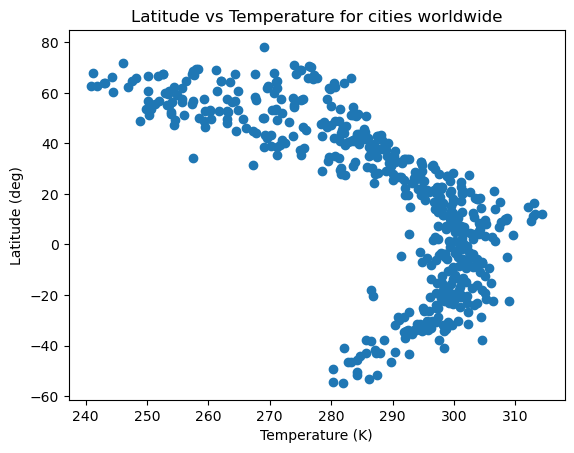

In [34]:
# Build scatter plot for latitude vs. temperature
fig, ax = plt.subplots ()

# Incorporate the other graph properties
ax.set_xlabel ('Temperature (K)')
ax.set_ylabel ('Latitude (deg)')
ax.set_title ('Latitude vs Temperature for cities worldwide')
ax.scatter (city_data_df ['temp_max'], city_data_df ['lat'], marker = 'o')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

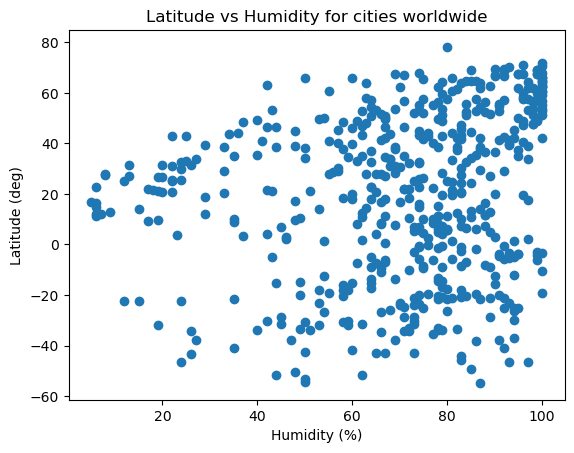

In [35]:
# Build the scatter plots for latitude vs. humidity
fig, ax = plt.subplots ()

# Incorporate the other graph properties
ax.set_xlabel ('Humidity (%)')
ax.set_ylabel ('Latitude (deg)')
ax.set_title ('Latitude vs Humidity for cities worldwide')
ax.scatter (city_data_df ['humidity'], city_data_df ['lat'], marker = 'o')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

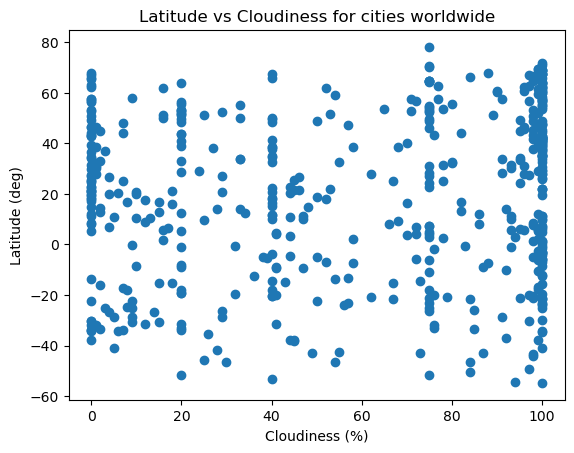

In [36]:
# Build the scatter plots for latitude vs. cloudiness
fig, ax = plt.subplots ()

# Incorporate the other graph properties
ax.set_xlabel ('Cloudiness (%)')
ax.set_ylabel ('Latitude (deg)')
ax.set_title ('Latitude vs Cloudiness for cities worldwide')
ax.scatter (city_data_df ['all'], city_data_df ['lat'], marker = 'o')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

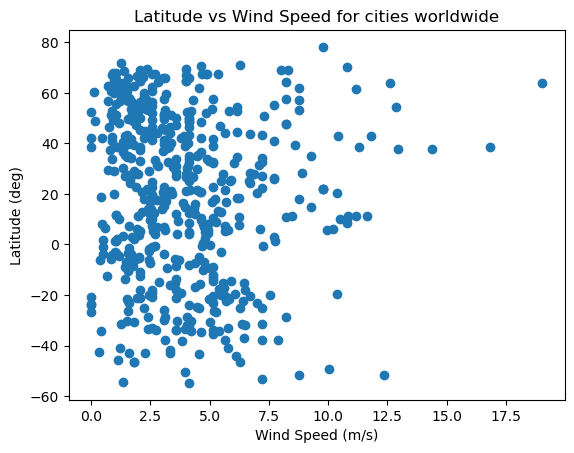

In [37]:
# Build the scatter plots for latitude vs. wind speed
fig, ax = plt.subplots ()

# Incorporate the other graph properties
ax.set_xlabel ('Wind Speed (m/s)')
ax.set_ylabel ('Latitude (deg)')
ax.set_title ('Latitude vs Wind Speed for cities worldwide')
ax.scatter (city_data_df ['speed'], city_data_df ['lat'], marker = 'o')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
def linreg (region, x, y, variable, units):
    slope, intercept, r, p, se = linregress (x, y)
    res = stats.linregress (x, y)

    fig, ax = plt.subplots ()
    plt.plot (x, y, 'o', label = 'original data')
    ax.set_xlabel ('Latitude (deg)')
    ax.set_ylabel (variable + ' (' + units + ')')
    ax.set_title ('Linear regression plot for ' + region + ' hemisphere ' + variable + ' vs Latitude')

    plt.plot (x, res.intercept + res.slope * x, 'r', label = 'fitted line')
    plt.legend ()
    plt.show ()
    print ('Slope = ', slope, 'intercept = ', intercept, 'r = ', r, 'p = ', p, 'se = ', se)
    return

In [39]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame (northern_hemi)

# Display sample data
northern_hemi_df.head()

,name,lat,lon,temp_max,humidity,all,speed,country,dt
0,hamilton,39.1834,-84.5333,288.84,97,100,5.14,US,1709742840
1,enewetak,11.3474,162.3373,299.44,80,47,10.84,MH,1709743140
2,isafjordur,66.0755,-23.1240,283.17,50,40,4.12,IS,1709743146
3,ocean city,39.2776,-74.5746,282.29,93,100,1.79,US,1709743147
4,kangasniemi,61.9936,26.6479,271.16,98,52,1.40,FI,1709742996


In [40]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame (southern_hemi)

# Display sample data
southern_hemi_df.head()

,name,lat,lon,temp_max,humidity,all,speed,country,dt
0,cabedelo,-6.9811,-34.8339,304.52,67,52,4.75,BR,1709743133
1,cururupu,-1.8283,-44.8683,301.30,86,76,2.43,BR,1709743134
2,port-aux-francais,-49.3500,70.2167,280.23,85,97,10.05,TF,1709743136
3,grytviken,-54.2811,-36.5092,280.37,50,94,1.33,GS,1709743142
4,port elizabeth,-33.9180,25.5701,293.76,79,20,3.60,ZA,1709743144


###  Temperature vs. Latitude Linear Regression Plot

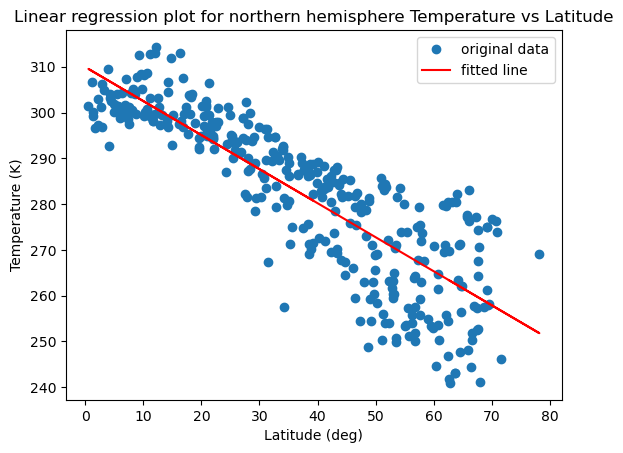

Slope =  -0.7433023823753694 intercept =  309.9301619841581 r =  -0.8548751741254715 p =  1.2656845643503083e-106 se =  0.023548214741216048


In [41]:
# Linear regression on Northern Hemisphere
linreg ('northern', northern_hemi_df ['lat'], northern_hemi_df ['temp_max'], 'Temperature', 'K')         

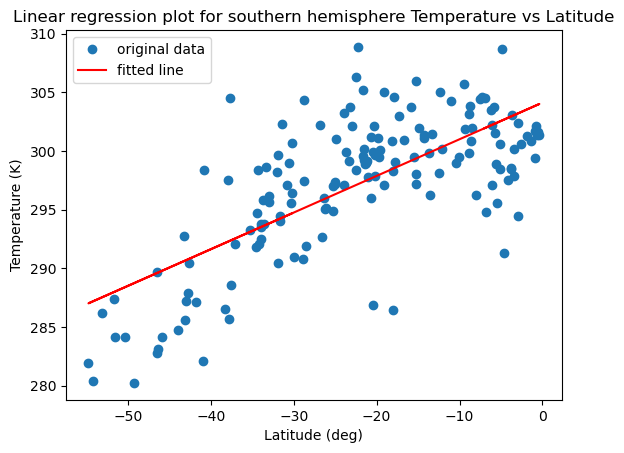

Slope =  0.31223362257231185 intercept =  304.12765956946765 r =  0.7092449273358322 p =  1.8410914337494866e-25 se =  0.02484774207671382


In [42]:
# Linear regression on Southern Hemisphere
linreg ('southern', southern_hemi_df ['lat'], southern_hemi_df ['temp_max'], 'Temperature', 'K')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [43]:
#For both hemispheres the r-values aren't much less than one, meaning the regression lines are good fits.

### Humidity vs. Latitude Linear Regression Plot

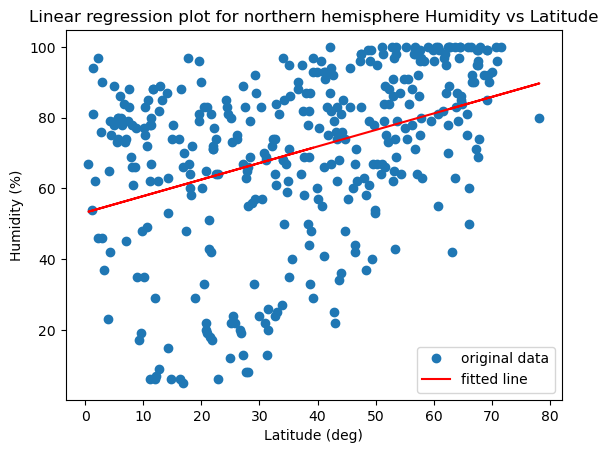

Slope =  0.4669311040200174 intercept =  53.16886748923973 r =  0.385303331467568 p =  1.6586444600985812e-14 se =  0.05837405697509034


In [44]:
# Northern Hemisphere
linreg ('northern', northern_hemi_df ['lat'], northern_hemi_df ['humidity'], 'Humidity', '%')

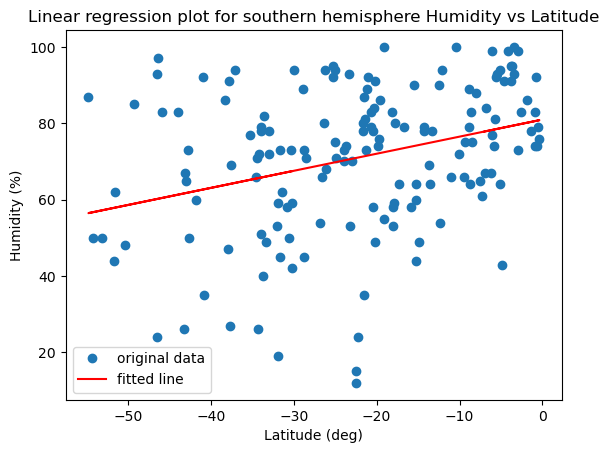

Slope =  0.4470737339865151 intercept =  80.97129799771044 r =  0.32284555274576365 p =  3.515377404413459e-05 se =  0.10493502885072349


In [45]:
# Southern Hemisphere
linreg ('southern', southern_hemi_df ['lat'], southern_hemi_df ['humidity'], 'Humidity', '%')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [46]:
#For both hemispheres the r-values are nearer zero then one, and so if the regression lines approximate the data it's probably due to chance.

### Cloudiness vs. Latitude Linear Regression Plot

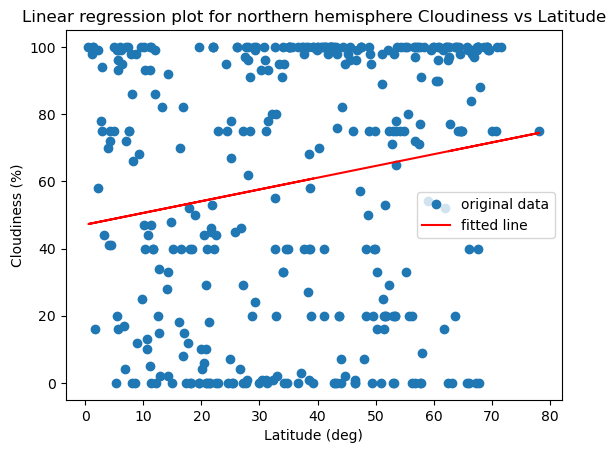

Slope =  0.3492396945528672 intercept =  47.10878867970443 r =  0.17889486169933483 p =  0.0005550225082492066 se =  0.10026044391568781


In [47]:
# Northern Hemisphere
linreg ('northern', northern_hemi_df ['lat'], northern_hemi_df ['all'], 'Cloudiness', '%')

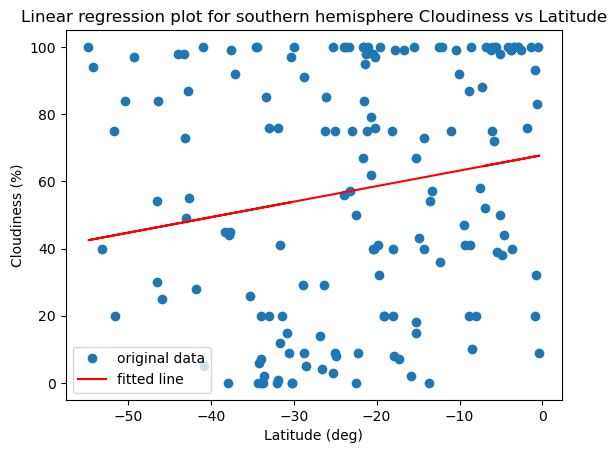

Slope =  0.4620088231893576 intercept =  67.81009720799968 r =  0.17687614497738607 p =  0.026202050773823413 se =  0.20583379448319308


In [48]:
# Southern Hemisphere
linreg ('southern', southern_hemi_df ['lat'], southern_hemi_df ['all'], 'Cloudiness', '%')

In [49]:
#Here, the r-values are even closer to zero, meaning the regression lines are not good fits.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

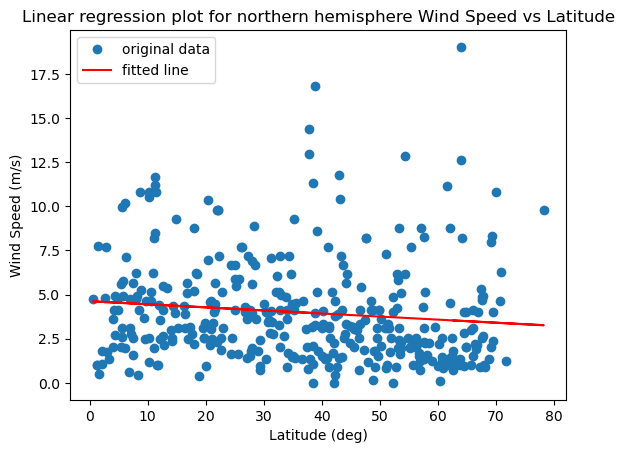

Slope =  -0.017382661929545663 intercept =  4.627356881135663 r =  -0.11927619343560156 p =  0.021926786870199694 se =  0.007552973869234073


In [50]:
# Northern Hemisphere
linreg ('northern', northern_hemi_df ['lat'], northern_hemi_df ['speed'], 'Wind Speed', 'm/s')

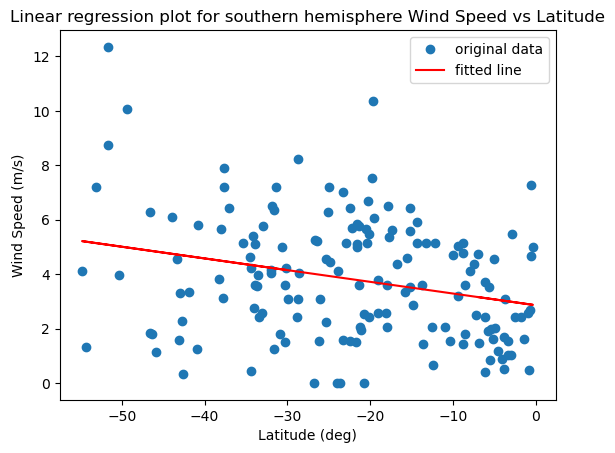

Slope =  -0.04302524806072487 intercept =  2.854746380640467 r =  -0.26802418573201864 p =  0.00066218822590579 se =  0.01238224043502801


In [51]:
# Southern Hemisphere
linreg ('southern', southern_hemi_df ['lat'], southern_hemi_df ['speed'], 'Wind Speed', 'm/s')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [52]:
#Ditto for wind speed.